In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
from pandas import Series
from pandas import DataFrame
from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
import scipy as sp
import seaborn as sns

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import sklearn
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from collections import Counter
from sklearn import datasets

from IPython.display import Image
from IPython.core.display import HTML

In [54]:
#set default plotting parameters
rcParams['figure.figsize'] = 8,4
sns.set_style('whitegrid')
np.set_printoptions(precision=4,suppress=True)

### Setting Up Cluster Analysis

In [7]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
x=scale(iris.data)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
y=pd.DataFrame(iris.target)
variable_names= iris.feature_names


### Building and running your model

In [15]:
clustering = KMeans(n_clusters=3,random_state=5) #  random state ensures that you get the same results every time
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [49]:
pd.DataFrame(clustering.labels_).head()

,0
0,1
1,1
2,1
3,1
4,1


In [50]:
pd.DataFrame(iris.target).head()

,0
0,0
1,0
2,0
3,0
4,0


### Plotting your model outputs

In [17]:
iris_df= pd.DataFrame(iris.data)
iris_df.columns=['sepal_length','sepal_width','petal_length','pedal_width']
y.columns=['Targets']


In [22]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

Text(0.5,1,'K-Means Clustering Classification')

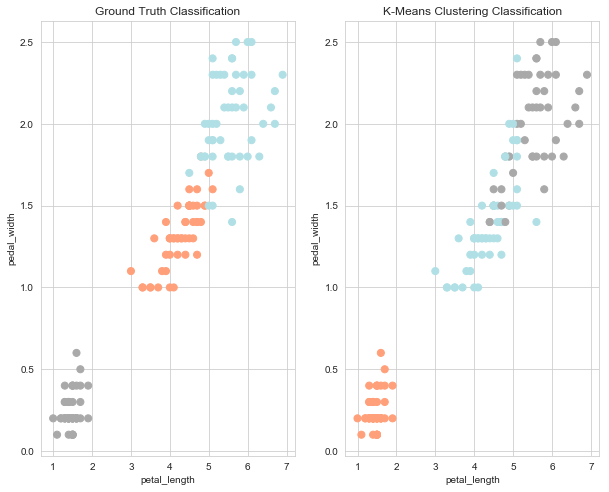

In [46]:
f,ax = plt.subplots(1,2,figsize=(10,8))

iris_df.plot(kind='scatter',x='petal_length',y='pedal_width',c=color_theme[iris.target],s=50,ax=ax[0])
ax[0].set_title('Ground Truth Classification')

iris_df.plot(kind='scatter',x='petal_length',y='pedal_width',c=color_theme[clustering.labels_],s=50,ax=ax[1])
ax[1].set_title('K-Means Clustering Classification')


Text(0.5,1,'K-Means Clustering Classification')

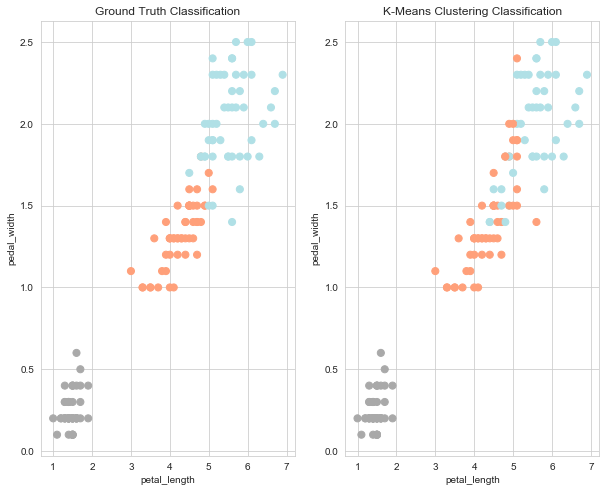

In [51]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
f,ax = plt.subplots(1,2,figsize=(10,8))

iris_df.plot(kind='scatter',x='petal_length',y='pedal_width',c=color_theme[iris.target],s=50,ax=ax[0])
ax[0].set_title('Ground Truth Classification')

iris_df.plot(kind='scatter',x='petal_length',y='pedal_width',c=color_theme[relabel],s=50,ax=ax[1])
ax[1].set_title('K-Means Clustering Classification')


### Evaluation your clustering results

In [52]:
print (classification_report(y,relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150



### Hierarchical Clustering/Dendrogram

In [85]:
url = 'C:/Users/mailm_000/Desktop/Python Learning/Ex_Files_Python_Data_Science_EssT/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch02/02_03/mtcars.csv'

cars= pd.read_csv(url)

cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']


In [118]:
c=cars[['mpg','disp','hp','wt']]

scaled=cars[['mpg','disp','hp','wt','am']]

c.head()

,mpg,disp,hp,wt
0,21.0,160.0,110,2.620
1,21.0,160.0,110,2.875
2,22.8,108.0,93,2.320
3,21.4,258.0,110,3.215
4,18.7,360.0,175,3.440


In [87]:
d=cars[['am']]
d.head()

,am
0,1
1,1
2,1
3,0
4,0


### Using Scipy to generate dendrograms

In [90]:
#linkage function carries out hierarchial clustering on data
e=linkage(c,'ward')
e


array([[  0.    ,   1.    ,   0.255 ,   2.    ],
       [ 11.    ,  12.    ,   0.9621,   2.    ],
       [  9.    ,  10.    ,   1.4   ,   2.    ],
       [ 13.    ,  33.    ,   1.9103,   3.    ],
       [ 17.    ,  25.    ,   5.1157,   2.    ],
       [ 20.    ,  26.    ,   7.5097,   2.    ],
       [  6.    ,  23.    ,  10.0535,   2.    ],
       [ 19.    ,  36.    ,  10.1666,   3.    ],
       [ 21.    ,  22.    ,  14.0035,   2.    ],
       [  2.    ,  37.    ,  14.1771,   3.    ],
       [ 14.    ,  15.    ,  15.6215,   2.    ],
       [ 18.    ,  39.    ,  16.7875,   4.    ],
       [ 31.    ,  41.    ,  19.8678,   4.    ],
       [ 32.    ,  34.    ,  21.6097,   4.    ],
       [ 28.    ,  38.    ,  22.5473,   3.    ],
       [  8.    ,  44.    ,  29.8447,   5.    ],
       [  3.    ,   5.    ,  33.5403,   2.    ],
       [ 16.    ,  42.    ,  38.201 ,   3.    ],
       [  4.    ,  24.    ,  40.0052,   2.    ],
       [ 27.    ,  47.    ,  41.616 ,   6.    ],
       [  7.    ,  5

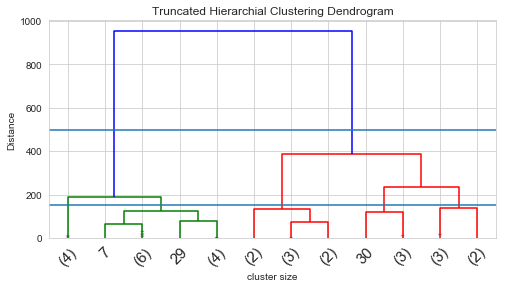

In [95]:
dendrogram(e,
           truncate_mode='lastp',# show only the last p merged clusters
           p=12,# show only the last p merged clusters
           leaf_rotation=45.,
           leaf_font_size=15.,
           show_contracted=True)
plt.title('Truncated Hierarchial Clustering Dendrogram')
plt.xlabel('cluster size')
plt.ylabel('Distance')
plt.axhline(y=500)
plt.axhline(y=150)

### Generation hierarchial cluster

In [98]:
k= 2 # number of clusters
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(c)

sm.accuracy_score(d,Hclustering.labels_)

0.78125

In [99]:
k= 2 # number of clusters
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')#changing linkage
Hclustering.fit(c)

sm.accuracy_score(d,Hclustering.labels_)

0.4375

In [100]:
k= 2 # number of clusters
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')#changing linkage
Hclustering.fit(c)

sm.accuracy_score(d,Hclustering.labels_)

0.78125

In [101]:
k= 2 # number of clusters
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='manhattan',linkage='average') #changing affinity
Hclustering.fit(c)

sm.accuracy_score(d,Hclustering.labels_)

0.71875

In [103]:
k= 2 # number of clusters
Hclustering = AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='average')#changing linkage
Hclustering.fit(c)

#sm.accuracy_score(d,Hclustering.labels_)
Hclustering.labels_

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [104]:
cars['Hclustering_am']=pd.DataFrame(Hclustering.labels_)

In [108]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Hclustering_am
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0


In [107]:
cars.query("am !=Hclustering_am ")

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Hclustering_am
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,1
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4,0
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8,0


In [127]:
cc=scaled[['mpg','disp','hp','wt']]
dd=scaled['am']
cc_scaled=scale(cc)
dd_scaled=scale(dd)

dd_scaled

C:\Users\mailm_000\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([ 1.2089,  1.2089,  1.2089, -0.8272, -0.8272, -0.8272, -0.8272,
       -0.8272, -0.8272, -0.8272, -0.8272, -0.8272, -0.8272, -0.8272,
       -0.8272, -0.8272, -0.8272,  1.2089,  1.2089,  1.2089, -0.8272,
       -0.8272, -0.8272, -0.8272, -0.8272,  1.2089,  1.2089,  1.2089,
        1.2089,  1.2089,  1.2089,  1.2089])

In [128]:
Kclustering = KMeans(n_clusters=2,random_state=5) #  random state ensures that you get the same results every time


Kclustering.fit(cc_scaled)
sm.accuracy_score(dd,Kclustering.labels_)

0.28125

In [111]:
cars['Kclustering_am']=pd.DataFrame(Kclustering.labels_)
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Hclustering_am,Kclustering_am
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0,1


In [113]:
scale(c)

array([[ 0.1533, -0.5798, -0.5437, -0.6202],
       [ 0.1533, -0.5798, -0.5437, -0.3554],
       [ 0.4567, -1.006 , -0.7956, -0.9317],
       [ 0.2207,  0.2236, -0.5437, -0.0023],
       [-0.2344,  1.0598,  0.4195,  0.2313],
       [-0.3356, -0.0469, -0.6177,  0.2521],
       [-0.9762,  1.0598,  1.4568,  0.3663],
       [ 0.7265, -0.6888, -1.2549, -0.0283],
       [ 0.4567, -0.7371, -0.7659, -0.0698],
       [-0.1501, -0.5174, -0.351 ,  0.2313],
       [-0.3861, -0.5174, -0.351 ,  0.2313],
       [-0.6222,  0.3695,  0.4936,  0.8855],
       [-0.4704,  0.3695,  0.4936,  0.5324],
       [-0.8244,  0.3695,  0.4936,  0.5843],
       [-1.6336,  1.9779,  0.8641,  2.1107],
       [-1.6336,  1.8795,  1.0123,  2.2914],
       [-0.9087,  1.7156,  1.2346,  2.2094],
       [ 2.0751, -1.2462, -1.1957, -1.0563],
       [ 1.7379, -1.2708, -1.4031, -1.6637],
       [ 2.3279, -1.3085, -1.2105, -1.4353],
       [ 0.2376, -0.9068, -0.7363, -0.7811],
       [-0.7739,  0.7155,  0.0491,  0.3144],
       [-0

### K-nearest neighbor clustering

In [157]:
#preparing the data
#use cases
# 1. stock price prediction
# 2. recommendation systems
# 3. credit risk analysis
# 4. predictive trip planning

# assumptions
# 1. data has little noice
# 2. labeled
# 3.only relevant features
# 4. distiguishable subfeatures shouldn't use on large datasets because is takes a long time

x_prime=preprocessing.scale(c)
x_prime

array([[ 0.1533, -0.5798, -0.5437, -0.6202],
       [ 0.1533, -0.5798, -0.5437, -0.3554],
       [ 0.4567, -1.006 , -0.7956, -0.9317],
       [ 0.2207,  0.2236, -0.5437, -0.0023],
       [-0.2344,  1.0598,  0.4195,  0.2313],
       [-0.3356, -0.0469, -0.6177,  0.2521],
       [-0.9762,  1.0598,  1.4568,  0.3663],
       [ 0.7265, -0.6888, -1.2549, -0.0283],
       [ 0.4567, -0.7371, -0.7659, -0.0698],
       [-0.1501, -0.5174, -0.351 ,  0.2313],
       [-0.3861, -0.5174, -0.351 ,  0.2313],
       [-0.6222,  0.3695,  0.4936,  0.8855],
       [-0.4704,  0.3695,  0.4936,  0.5324],
       [-0.8244,  0.3695,  0.4936,  0.5843],
       [-1.6336,  1.9779,  0.8641,  2.1107],
       [-1.6336,  1.8795,  1.0123,  2.2914],
       [-0.9087,  1.7156,  1.2346,  2.2094],
       [ 2.0751, -1.2462, -1.1957, -1.0563],
       [ 1.7379, -1.2708, -1.4031, -1.6637],
       [ 2.3279, -1.3085, -1.2105, -1.4353],
       [ 0.2376, -0.9068, -0.7363, -0.7811],
       [-0.7739,  0.7155,  0.0491,  0.3144],
       [-0

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x_prime,d,test_size=.33,random_state=17) #random state ensures the same results all the time

In [154]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train.values.ravel())

#print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [151]:
y_expect = y_test
y_pred = clf.predict(x_test)
print(classification_report(y_expect,y_pred))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83         5
          1       1.00      0.67      0.80         6

avg / total       0.87      0.82      0.82        11



In [155]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [156]:
x_test

array([[ 0.1533, -0.5798, -0.5437, -0.6202],
       [ 1.7379, -1.2708, -1.4031, -1.6637],
       [-1.1447,  0.9778,  1.4568,  0.6466],
       [-0.6222,  0.3695,  0.4936,  0.8855],
       [-0.3356, -0.0469, -0.6177,  0.2521],
       [-0.1501,  1.3877,  0.4195,  0.6518],
       [-0.0659, -0.7027,  0.4195, -0.4644],
       [ 2.3279, -1.3085, -1.2105, -1.4353],
       [ 0.9962, -0.9052, -0.8252, -1.1186],
       [-0.7233,  0.986 ,  1.7384, -0.0491],
       [ 0.2207,  0.2236, -0.5437, -0.0023]])

In [163]:
KN_results=clf.predict(x_prime)
cars['KN_results']=pd.DataFrame(KN_results)
cars.head(10)


,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Hclustering_am,Kclustering_am,KN_results
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,0,1
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,0,0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,0,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0,0,0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,0,1,0
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0,0,0
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,1,0
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,0,0
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,0,0
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1,0,0
